# Inference: Adaptive MCMC with extra options

This example shows you how to perform Bayesian inference on a time series, using an adaptive MCMC method.

This example also shows you how to change the default options if desired.

In [1]:
from __future__ import print_function
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as pl

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 100000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleSeriesProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
prior = pints.UniformPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
    )

# Create a Bayesian log-likelihood (prior * likelihood)
log_likelihood = pints.BayesianLogLikelihood(prior, log_likelihood)

# Create an adaptive covariance MCMC routine (for fine tune)
x0 = real_parameters * 1.1
mcmc = pints.AdaptiveCovarianceMCMC(log_likelihood, x0)

# Print out the default setup
def print_setup(mcmc):
    print('\n## Adaptive convariance MCMC routine setup info')
    print('Target acceptance rate: ' + str(mcmc.acceptance_rate()))
    print('Total number of iterations: ' + str(mcmc.iterations()))
    print('Number of iterations before adapation: ' + str(mcmc.adaptation()))
    print('Number of iterations to discard as burn-in: ' + str(mcmc.burn_in()))
    print('Thinning: Store only one sample per ' + str(mcmc.thinning()) + '\n')

print('#'*10 + ' Default setup')
print_setup(mcmc)

# Fine tune the MCMC routine
mcmc.set_acceptance_rate(0.3)
mcmc.set_iterations(12000)
mcmc.set_adaptation_rate(0.2)
mcmc.set_burn_in_rate(0.4)
mcmc.set_thinning(8)

# Print out the new setup
print('#'*10 + ' New setup')
print_setup(mcmc)

# Then run it
print('#'*10 + ' Start running')
chain = mcmc.run()

########## Default setup

## Adaptive convariance MCMC routine setup info
Target acceptance rate: 0.25
Total number of iterations: 6000
Number of iterations before adapation: 1500
Number of iterations to discard as burn-in: 3000
Thinning: Store only one sample per 4

########## New setup

## Adaptive convariance MCMC routine setup info
Target acceptance rate: 0.3
Total number of iterations: 12000
Number of iterations before adapation: 2400
Number of iterations to discard as burn-in: 4800
Thinning: Store only one sample per 8

########## Start running

## Adaptive convariance MCMC routine setup info
Target acceptance rate: 0.3
Total number of iterations: 12000
Number of iterations before adapation: 2400
Number of iterations to discard as burn-in: 4800
Thinning: Store only one sample per 8

Iteration 0 of 12000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0
Iteration 50 of 12000
  In burn-in: True
  Adapting: False
  Acceptance rate: 0.0392156862745
Iteration 100 of 12000
  

Iteration 3950 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.120222728423
Iteration 4000 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.125718570357
Iteration 4050 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.130585040731
Iteration 4100 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.132894415996
Iteration 4150 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.136111780294
Iteration 4200 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.139490597477
Iteration 4250 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.140672782875
Iteration 4300 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.144152522669
Iteration 4350 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.146862790163
Iteration 4400 of 12000
  In burn-in: True
  Adapting: True
  Acceptance rate: 0.149284253579
Iteration 4450 of 12000
  In burn-in: True
  Adapting: True


Iteration 8300 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.22370798699
Iteration 8350 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.223685786133
Iteration 8400 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.224020949887
Iteration 8450 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.224470476867
Iteration 8500 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.225149982355
Iteration 8550 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.224769032862
Iteration 8600 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.225787699105
Iteration 8650 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.225869841637
Iteration 8700 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.225836110792
Iteration 8750 of 12000
  In burn-in: False
  Adapting: True
  Acceptance rate: 0.226259856016
Iteration 8800 of 12000
  In burn-in: False
  Adapt

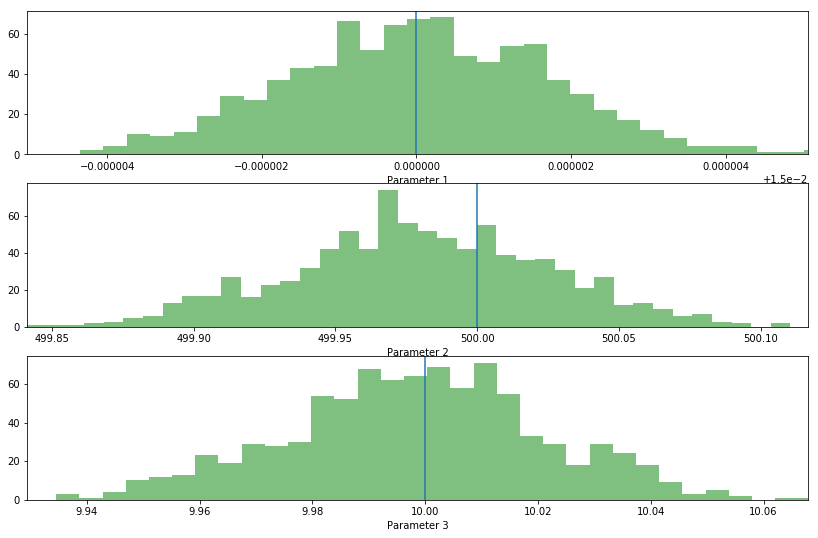

In [2]:
# Plot output
pl.figure(figsize=(14, 9))
for i, real in enumerate(real_parameters):
    
    # Add subplot
    pl.subplot(len(real_parameters), 1, 1+i)
    pl.xlabel('Parameter ' + str(i + 1))
    
    # Show true value
    pl.axvline(real)
    
    # Show histogram of chain
    pl.hist(chain[:,i], label='p' + str(i + 1), bins=40, color='green',
        alpha=0.5)
    
    # Center plot around mean of chain
    mu = np.mean(chain[:,i])
    sigma = np.std(chain[:,i])
    pl.xlim(mu - 3 * sigma, mu + 3 * sigma)

pl.show()